In [2]:
import sys
sys.path.append('../..')

from practice import utils

import numpy as np
import matplotlib.pyplot as plt

iterations 11


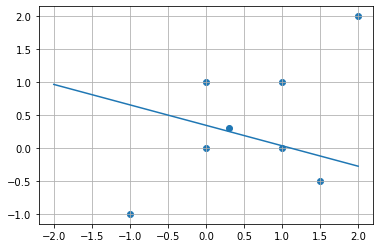

In [3]:
x = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
    [2, 2],
    [-1, -1],
    [0.3, 0.3],
    [1.5, -0.5]
], dtype=float).T # 2*4
y = np.array([-1, -1, 1, 1, 1, -1, 1, -1]) # 1*4 vector


def plot_2d_hyperplane(th, th0, x, start=-2, stop=2):
    xt = np.linspace(-2, 2, 100)
    # th1*x + th2*y + th0 = 0
    th1 = th[0][0]
    th2 = th[1][0]
    yt = -th1/th2 * xt  - th0/th2

    plt.grid(True)
    # print(x[0], x[1], x)
    plt.scatter(x[0], x[1])
    plt.plot(xt, yt)


def perceptron(x: np.array, y: np.array, t: int) -> tuple[np.array]:
    """
    Perceptron learning algorithm.
    returns tuple of th and th0.
    """
    th = utils.rv([0, 0]) # 2*1
    th0 = 0 # 1*1
    k = 0
    for i in range(t):
        for j in range(x.shape[1]):
            yj = y[j]
            xj = x[:, j:j+1]
            r = yj * (np.dot(th.T, xj) + th0)  
            if r <= 0:
                k+=1
                th = th + yj * xj
                th0 = th0 + yj
    print('iterations', k)
    return th, th0

th, th0 = perceptron(x, y, 25)
plot_2d_hyperplane(th, th0, x)

In [4]:
utils.positive(x, th, th0)
print(utils.score(x, y, th, th0))
th, th0

[[ True  True  True  True  True  True  True  True]]


(array([[0.9],
        [2.9]]),
 -1)